In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
cols_to_norm=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

#### Normalize Method:
(x - min)/(max - min)

In [5]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [7]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
gluc = tf.feature_column.numeric_column('Glucose')
bp = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diab_ped_fn = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')
outcome = tf.feature_column.numeric_column('Outcome')

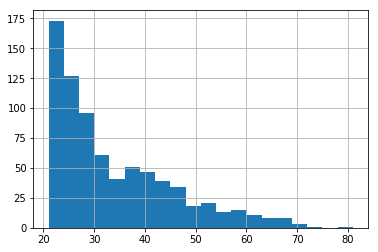

In [8]:
diabetes['Age'].hist(bins=20)

In [9]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [10]:
feat_cols=[num_preg,gluc,bp,skin_thick,insulin,bmi,diab_ped_fn,age]

In [11]:
feat_cols

[_NumericColumn(key='Pregnancies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BloodPressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='SkinThickness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='DiabetesPedigreeFunction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [12]:
x_data = diabetes.drop('Outcome',axis=1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [13]:
labels = diabetes['Outcome']

In [14]:
#labels

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size = 0.3,random_state=101)

In [16]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,
                                                 num_epochs=1000,batch_size=10,shuffle=True)

In [17]:
#optim = tf.train.FtrlOptimizer(learning_rate=0.01)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0mbcc2ig', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f694c739898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp0mbcc2ig/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 196.419
INFO:tensorflow:loss = 5.97673, step = 101 (0.514 sec)
INFO:tensorflow:global_step/sec: 280.812
INFO:tensorflow:loss = 4.92093, step = 201 (0.358 sec)
INFO:tensorflow:global_step/sec: 200.878
INFO:tensorflow:loss = 5.73893, step = 301 (0.495 sec)
INFO:tensorflow:global_step/sec: 206.221
INFO:tensorflow:loss = 3.59744, step = 401 (0.483 sec)
INFO:tensorflow:global_step/sec: 202.433
INFO:tensorflow:loss = 5.88794, step = 501 (0.493 sec)
INFO:tensorflow:global_step/sec: 249.278
INFO:tensorflow:loss = 5.70824, step = 601 (0.404 sec)
INFO:tensorflow:global_step/sec: 230.036
INFO:tensorflow:loss = 6.24612, step = 701 (0.432 sec)
INFO:tensorflow:global_step/sec: 210.419
INFO:tensorflow:loss = 5.17002, step = 801 (0.478 sec)
INFO:tensorflow:global_step/sec: 204.012
INFO:tensorflow:loss = 5.17767,

In [19]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,
                                                      batch_size=10,num_epochs=1000,shuffle=False)


In [20]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-24-06:53:16
INFO:tensorflow:Restoring parameters from /tmp/tmp0mbcc2ig/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-24-06:54:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.718615, accuracy_baseline = 0.649351, auc = 0.776461, auc_precision_recall = 0.611069, average_loss = 0.585671, global_step = 1000, label/mean = 0.350649, loss = 5.85671, prediction/mean = 0.430513


In [21]:
result

{'accuracy': 0.7186147,
 'accuracy_baseline': 0.64935064,
 'auc': 0.77646089,
 'auc_precision_recall': 0.61106914,
 'average_loss': 0.58567107,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.8567104,
 'prediction/mean': 0.43051302}

## GETTING PREDICTIONS

In [22]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [23]:
predictions = model.predict(pred_input_func)

In [24]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmp0mbcc2ig/model.ckpt-1000


In [25]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40182364], dtype=float32),
  'logits': array([-0.39787233], dtype=float32),
  'probabilities': array([ 0.59817636,  0.40182367], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53604549], dtype=float32),
  'logits': array([ 0.14443254], dtype=float32),
  'probabilities': array([ 0.46395451,  0.53604549], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.41459617], dtype=float32),
  'logits': array([-0.34499693], dtype=float32),
  'probabilities': array([ 0.58540386,  0.4145962 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.38725069], dtype=float32),
  'logits': array([-0.45888364], dtype=float32),
  'probabilities': array([ 0.61274934,  0.38725069], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [26]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols
                                       ,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp27j02pxf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f694466c8d0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp27j02pxf/model.ckpt.
INFO:tensorflow:loss = 20.2289, step = 1
INFO:tensorflow:global_step/sec: 195.201
INFO:tensorflow:loss = 6.41858, step = 101 (0.520 sec)
INFO:tensorflow:global_step/sec: 226.956
INFO:tensorflow:loss = 6.21262, step = 201 (0.438 sec)
INFO:tensorflow:global_step/sec: 227.415
INFO:tensorflow:loss = 6.69285, step = 301 (0.446 sec)
INFO:tensorflow:global_step/sec: 222.142
INFO:tensorflow:loss = 6.11896, step = 401 (0.446 sec)
INFO:tensorflow:global_step/sec: 225.16
INFO:tensorflow:loss = 5.98044, step = 501 (0.439 sec)
INFO:tensorflow:global_step/sec: 175.56
INFO:tensorflow:loss = 6.25417, step = 601 (0.581 sec)
INFO:tensorflow:global_step/sec: 187.187
INFO:tensorflow:loss = 5.91616, step = 701 (0.529 sec)
INFO:tensorflow:global_step/sec: 224.495
INFO:tensorflow:loss = 6.76884, step = 801 (0.450 sec)
INFO:tensorflow:global_step/sec: 249.132
INFO:tensorflow:loss = 7.06778, s

In [28]:
result = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-24-07:05:45
INFO:tensorflow:Restoring parameters from /tmp/tmp27j02pxf/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-24-07:07:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.636364, accuracy_baseline = 0.649351, auc = 0.736626, auc_precision_recall = 0.500609, average_loss = 0.594711, global_step = 1000, label/mean = 0.350649, loss = 5.94711, prediction/mean = 0.372565


In [29]:
result

{'accuracy': 0.63636363,
 'accuracy_baseline': 0.64935064,
 'auc': 0.73662555,
 'auc_precision_recall': 0.50060856,
 'average_loss': 0.59471083,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.9471083,
 'prediction/mean': 0.37256509}